In [14]:
%matplotlib notebook

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
month_data = '../Month/Merge_Date.csv'
month_df = pd.read_csv(month_data, parse_dates=True)

In [17]:
month_df.dtypes

Unnamed: 0            int64
Movie                object
Box Office          float64
Release Date_x       object
Award_date           object
Win or Nominated     object
Release Year        float64
Release Month       float64
dtype: object

In [18]:
month_df['Release Month'].astype(int)
month_df.head()

,Unnamed: 0,Movie,Box Office,Release Date_x,Award_date,Win or Nominated,Release Year,Release Month
0,0,Capote,28337516.0,2005-09-30,2006-03-05,W,2005.0,9.0
1,1,American Hustle,99165609.0,2013-12-12,2014-03-02,N,2013.0,12.0
2,2,Brokeback Mountain,82970165.0,2005-09-10,2006-03-05,W,2005.0,9.0
3,3,Walk the Line,119317827.0,2005-09-13,2006-03-05,W,2005.0,9.0
4,4,"Good Night, and Good Luck.",31500000.0,2005-09-16,2006-03-05,N,2005.0,9.0


In [19]:
#categorize ranges of days
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_df['Release Month'] = pd.cut(month_df['Release Month'], bins=bins, labels=labels)
month_df.head()

,Unnamed: 0,Movie,Box Office,Release Date_x,Award_date,Win or Nominated,Release Year,Release Month
0,0,Capote,28337516.0,2005-09-30,2006-03-05,W,2005.0,Sep
1,1,American Hustle,99165609.0,2013-12-12,2014-03-02,N,2013.0,Dec
2,2,Brokeback Mountain,82970165.0,2005-09-10,2006-03-05,W,2005.0,Sep
3,3,Walk the Line,119317827.0,2005-09-13,2006-03-05,W,2005.0,Sep
4,4,"Good Night, and Good Luck.",31500000.0,2005-09-16,2006-03-05,N,2005.0,Sep


In [20]:
month_df['Month Count'] = ''
month_table=month_df[['Movie', 'Box Office', 'Release Date_x', 'Release Month', 'Month Count', 'Win or Nominated']]
month_table.head()

,Movie,Box Office,Release Date_x,Release Month,Month Count,Win or Nominated
0,Capote,28337516.0,2005-09-30,Sep,,W
1,American Hustle,99165609.0,2013-12-12,Dec,,N
2,Brokeback Mountain,82970165.0,2005-09-10,Sep,,W
3,Walk the Line,119317827.0,2005-09-13,Sep,,W
4,"Good Night, and Good Luck.",31500000.0,2005-09-16,Sep,,N


In [21]:
winner = month_table[month_table["Win or Nominated"] == "W"]
winner_count = winner.groupby(["Release Month"]).count()["Win or Nominated"]
winner_count

Release Month
Jan      7
Feb      3
Mar      4
Apr      2
May      9
Jun     13
July     9
Aug      7
Sep     14
Oct     19
Nov     18
Dec     29
Name: Win or Nominated, dtype: int64

In [22]:
nominate = month_table[month_table["Win or Nominated"] == "N"]
nominate_count = nominate.groupby(["Release Month"]).count()["Win or Nominated"]
nominate_count

Release Month
Jan     21
Feb     14
Mar     13
Apr     15
May     21
Jun     27
July    14
Aug     18
Sep     48
Oct     39
Nov     28
Dec     43
Name: Win or Nominated, dtype: int64

<IPython.core.display.Javascript object>


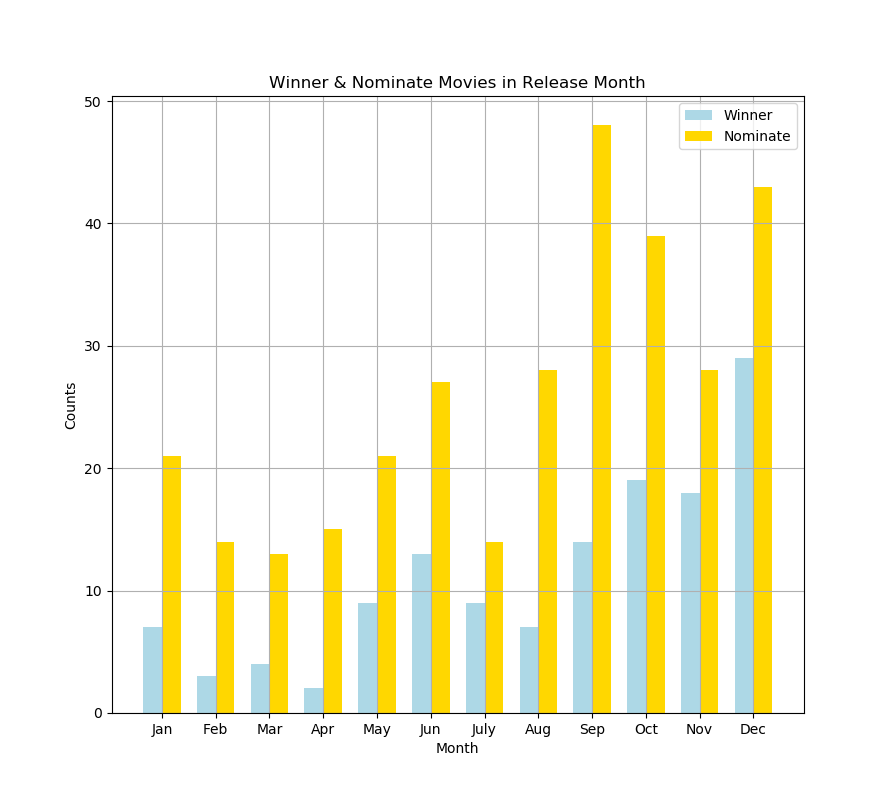

In [23]:
N = 12
winner_value = [7,3,4,2,9,13,9,7,14,19,18,29]
nominate_value = [21,14,13,15,21,27,14,28,48,39,28,43]
ind = np.arange(N) 
width = 0.35 
w_ = plt.bar(ind, winner_value, width, label='Winner', color='lightblue')
n_ = plt.bar(ind + width, nominate_value, width, label='Nominate', color='gold')
plt.xticks(ind + width / 2, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.legend((w_[0], n_[0]), ('Winner', 'Nominate'))


In [25]:
plt.title("Winner & Nominate Movies in Release Month")
plt.xlabel("Month")
plt.ylabel("Counts")
plt.grid()

In [26]:
# Save Figure
plt.savefig("../Month/WN_month.png")